# Load Packages

In [23]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import norm
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.contingency_tables import mcnemar
import scipy, scipy.stats
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import statsmodels as sm

# Load Data

In [2]:
HighestPoverty = pd.read_excel('C:/Users/Aarons/Documents/GitHub/finalprojectstarwarriors/Whitney-branch/finalprojectstarwarriors/Whitney branch/PvsC1.xlsx')
HighestPoverty.head()

,Name,State,Race,Count,Poverty%,Insured,Population,Poverty Rank,2019Poverty%,2014Poverty%
0,Vulva,Arkansas,Asian or Pacific Islander,0,19,90.6,3004279,45,17.0%,19.2%
1,Vagina,Arkansas,American Indian or Alaska Native,0,19,90.6,3004279,45,17.0%,19.2%
2,Corpus Uteri,Arkansas,Black or African American,49,19,90.6,3004279,45,17.0%,19.2%
3,Other Female Genital Organs,Arkansas,Asian or Pacific Islander,0,19,90.6,3004279,45,17.0%,19.2%
4,Vulva,Arkansas,American Indian or Alaska Native,0,19,90.6,3004279,45,17.0%,19.2%


In [3]:
HighestPoverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          192 non-null    object 
 1   State         192 non-null    object 
 2   Race          192 non-null    object 
 3   Count         192 non-null    int64  
 4   Poverty%      192 non-null    int64  
 5   Insured       192 non-null    float64
 6   Population    192 non-null    int64  
 7   Poverty Rank  192 non-null    int64  
 8   2019Poverty%  192 non-null    object 
 9   2014Poverty%  192 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 15.1+ KB


In [4]:
uniqueValues = HighestPoverty['State'].unique()
print('Unique elements in column "State" ')
print(uniqueValues)

Unique elements in column "State" 
['Arkansas' 'South Carolina' 'West Virginia' 'Mississippi' 'New Mexico'
 'Oklahoma' 'Louisiana' 'Kentucky' 'Tennessee' 'Alabama']


# Question

## Which state has the highest cancer level according to the poverty% in the 10 states with the highest poverty rate?

# Data Wrangling

In [5]:
label_encoder =LabelEncoder()

In [6]:
HighestPoverty['State']= label_encoder.fit_transform(HighestPoverty['State'])

In [8]:
HighestPoverty1 = HighestPoverty.rename(columns={'Poverty%': 'PovertyRate'}, inplace=True)

In [9]:
HighestPoverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          192 non-null    object 
 1   State         192 non-null    int32  
 2   Race          192 non-null    object 
 3   Count         192 non-null    int64  
 4   PovertyRate   192 non-null    int64  
 5   Insured       192 non-null    float64
 6   Population    192 non-null    int64  
 7   Poverty Rank  192 non-null    int64  
 8   2019Poverty%  192 non-null    object 
 9   2014Poverty%  192 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 14.4+ KB


In [10]:
HighestPoverty2 = HighestPoverty[['State', 'Count', 'PovertyRate']]

# Test Assumptions

## Normality

C:\Users\Aarons\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PovertyRate', ylabel='Density'>

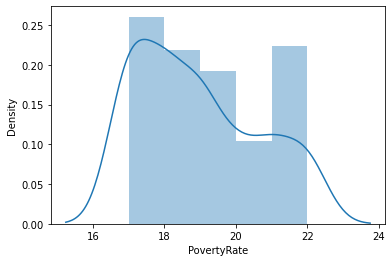

In [11]:
sns.distplot(HighestPoverty2['PovertyRate'])

## Homogeneity of Variance

### Bartlett's Test

In [12]:
scipy.stats.bartlett(HighestPoverty2['PovertyRate'], HighestPoverty2['State'])

BartlettResult(statistic=54.21270612262356, pvalue=1.7991966568898325e-13)

In [13]:
scipy.stats.bartlett(HighestPoverty2['PovertyRate'], HighestPoverty2['Count'])

BartlettResult(statistic=1368.008591181294, pvalue=1.880561710329563e-299)

In [14]:
scipy.stats.bartlett(HighestPoverty2['Count'], HighestPoverty2['State'])

BartlettResult(statistic=1160.0500829697241, pvalue=2.9353050174589434e-254)

### Fligner's Test

In [15]:
scipy.stats.fligner(HighestPoverty2['PovertyRate'], HighestPoverty2['State'])

FlignerResult(statistic=61.45098556082624, pvalue=4.539030664963224e-15)

In [16]:
scipy.stats.fligner(HighestPoverty2['PovertyRate'], HighestPoverty2['Count'])

FlignerResult(statistic=0.4851989755557293, pvalue=0.4860767840421847)

In [17]:
scipy.stats.fligner(HighestPoverty2['Count'], HighestPoverty2['State'])

FlignerResult(statistic=0.00489993749914846, pvalue=0.9441940149717842)

##### There are Violations of Homogeneity of Variance

### Computing ANOVAs with Unequal Variance (Violated Homogeneity of Variance Assumption)

### Post Hocs

#### Computing Post Hocs with Tukey's

In [18]:
postHoc = MultiComparison(HighestPoverty2['PovertyRate'], HighestPoverty['Count'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     0     18   1.9756   0.9  -4.8947  8.8459  False
     0     20   0.9756   0.9  -5.8947  7.8459  False
     0     21   0.4756   0.9   -4.402  5.3532  False
     0     22  -0.0244   0.9   -4.902  4.8532  False
     0     26  -0.0244   0.9  -6.8947  6.8459  False
     0     27  -0.0244   0.9  -6.8947  6.8459  False
     0     28  -2.0244   0.9   -6.902  2.8532  False
     0     29   1.9756   0.9  -4.8947  8.8459  False
     0     33  -2.0244   0.9  -8.8947  4.8459  False
     0     35  -2.0244   0.9   -6.902  2.8532  False
     0     39   2.9756   0.9  -3.8947  9.8459  False
     0     46   2.9756   0.9  -3.8947  9.8459  False
     0     49  -0.0244   0.9  -6.8947  6.8459  False
     0     50  -0.5244   0.9   -5.402  4.3532  False
     0     51  -2.0244   0.9  -8.8947  4.8459  False
     0     52  -2.0244   0.9  -8.8947  4.8459 

In [19]:
postHoc2 = MultiComparison(HighestPoverty2['PovertyRate'], HighestPoverty['State'])
postHoc2Results = postHoc2.tukeyhsd()
print(postHoc2Results)


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower upper reject
------------------------------------------------
     0      1      1.0  0.001   1.0   1.0   True
     0      2      1.0  0.001   1.0   1.0   True
     0      3      2.0  0.001   2.0   2.0   True
     0      4      4.0  0.001   4.0   4.0   True
     0      5      3.0  0.001   3.0   3.0   True
     0      6     -1.0  0.001  -1.0  -1.0   True
     0      7     -1.0  0.001  -1.0  -1.0   True
     0      8     -1.0  0.001  -1.0  -1.0   True
     0      9      0.0 0.5566   0.0   0.0  False
     1      2      0.0 0.5566   0.0   0.0  False
     1      3      1.0  0.001   1.0   1.0   True
     1      4      3.0  0.001   3.0   3.0   True
     1      5      2.0  0.001   2.0   2.0   True
     1      6     -2.0  0.001  -2.0  -2.0   True
     1      7     -2.0  0.001  -2.0  -2

C:\Users\Aarons\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:1291: RuntimeWarning: divide by zero encountered in true_divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic
C:\Users\Aarons\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:1291: RuntimeWarning: invalid value encountered in true_divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic


In [20]:
postHoc3 = MultiComparison(HighestPoverty2['State'], HighestPoverty['Count'])
postHoc3Results = postHoc3.tukeyhsd()
print(postHoc3Results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     0     18   0.3821   0.9 -12.0639 12.8282  False
     0     20  -1.6179   0.9 -14.0639 10.8282  False
     0     21  -2.6179   0.9  -11.454  6.2182  False
     0     22   0.8821   0.9   -7.954  9.7182  False
     0     26  -3.6179   0.9 -16.0639  8.8282  False
     0     27  -2.6179   0.9 -15.0639  9.8282  False
     0     28   2.3821   0.9   -6.454 11.2182  False
     0     29   0.3821   0.9 -12.0639 12.8282  False
     0     33   3.3821   0.9  -9.0639 15.8282  False
     0     35   1.8821   0.9   -6.954 10.7182  False
     0     39  -0.6179   0.9 -13.0639 11.8282  False
     0     46  -0.6179   0.9 -13.0639 11.8282  False
     0     49  -3.6179   0.9 -16.0639  8.8282  False
     0     50   0.3821   0.9   -8.454  9.2182  False
     0     51   1.3821   0.9 -11.0639 13.8282  False
     0     52   3.3821   0.9  -9.0639 15.8282 

### Computing Post Hocs When You've Violated the Assumption of Homogeneity of Variance

## Determine Means and Draw Conclusions

In [21]:
HighestPoverty2.groupby('State').mean()

,Count,PovertyRate
State,,
0,65.263158,18.0
1,51.250000,19.0
2,64.523810,19.0
3,49.000000,20.0
4,35.904762,22.0
5,25.000000,21.0
6,68.642857,17.0
7,72.176471,17.0
8,98.105263,17.0


### Tennessee has the highest cancer level according to the percent population below poverty in the 10 states with the highest poverty rate